<a href="https://colab.research.google.com/github/Unholy-Applepie/CIFAR-10-Classification/blob/main/Akshit'sVGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification on CIFAR10 data using VGG Network Architecture

My name is Akshit Kalita. I am a final year Information Technology student in Symbiosis Institute of Technology. In this notebook, I will demonstrate how I used Tensoflow 2.0 and VGG  Convolutional Network Architecture to build a Image Classification Model on the CIFAR10 dataset.

Let me start by importing Tensor Flow and required libraries.

In [ ]:
!pip install tensorflow-gpu==2.2.0

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from tensorflow.python.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

In [ ]:
device_name = tf.test.gpu_device_name()

## Data Preprocessing

I will now write code to load the dataset.

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()


In [ ]:
trainX.shape

(50000, 32, 32, 3)

In [ ]:
testX.shape

(10000, 32, 32, 3)

After observation, we notice that the cifar10 dataset contains 60,000 images with 50,000 examples in the train dataset and 10,00 examples in the test dataset, each being a 32X32 colour image with 3 channels.Now I will one hot encode it.

In [ ]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

I will now normalise the dataset and rescale the pixels to be in the range 0 to 1.

In [ ]:
  trainX = trainX/255.0
  testX = testX/255.0

## Developing the model

The VGG Architecture comprises of a Convolutional Neural Network having a very small receptive field consisting of 3X3 filters which is the smallest possible size that still captures Up, Left,Right and Down blocks. It uses ReLU as an Activation function on every layer.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

I have used 3 sets of 2 'Conv2D' layers and a 'MaxPooling2D' layer with increasing number of filters in every layer. 'He weight' initialization has been used since it is generally  considered good practice. I have also used increasing Dropout layers after every MaxPooling layer as a method of regularization to prevent overfitting. It forces layers deep in the network to regularize rather than the ones closer to the input.

Finally Batch Normalization is basically preprocessing at every single layer. It allows each layer to learn more independently of other layers. This allows the model to generalise better.

I have used Stochastic Gradient Descent as the optimiser with a learning rate of 0.001 and a momentum of 0.9. This helped me hit higher accuracy values compared to Adam, RMSProp and Adagrad. Categorical Cross Entropy has been used since we are dealing with a multiclass classification problem.

## Fitting the Model

This step involves fitting the model and stating the number of epochs and batch size. The model can then be evaluated by calculating and displaying the accuracy. I have used the test set as the validation set since the images in the dataset are of similar shape and size. However K-fold cross validation can also be used. I have also used Image Generator as a form of Data Augmentation to increase the training set and help the model generalise better to improve accuracy.

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(trainX, trainY, batch_size=30)
steps = int(trainX.shape[0] / 30)
history = model.fit(it_train, steps_per_epoch=steps, epochs=100,validation_data=(testX, testY), verbose=1)
acc = model.evaluate(testX, testY, verbose=1)

Epoch 1/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.9146 - accuracy: 0.3345 - val_loss: 1.4331 - val_accuracy: 0.4713
Epoch 2/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.5186 - accuracy: 0.4408 - val_loss: 1.3281 - val_accuracy: 0.5110
Epoch 3/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.3863 - accuracy: 0.4979 - val_loss: 1.5857 - val_accuracy: 0.4537
Epoch 4/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.3002 - accuracy: 0.5339 - val_loss: 1.3421 - val_accuracy: 0.5224
Epoch 5/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.2316 - accuracy: 0.5570 - val_loss: 1.2322 - val_accuracy: 0.5535
Epoch 6/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.1831 - accuracy: 0.5792 - val_loss: 1.1987 - val_accuracy: 0.5668
Epoch 7/100
1666/1666 [==============================] - 27s 16ms/step - loss: 1.1287 - accuracy: 0.5998 - val_loss: 1

## Plotting Learning curves for the model

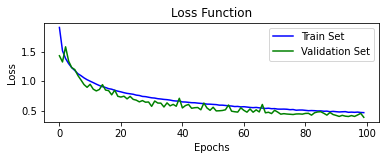

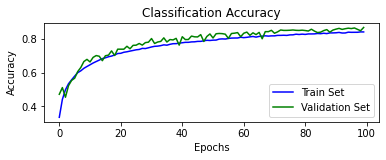

In [ ]:
# Graph 1
pyplot.subplot(211)
pyplot.title('Loss Function')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='green', label='test')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(['Train Set','Validation Set'],loc='upper right')
pyplot.show()
# Graph 2
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='green', label='test')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(['Train Set','Validation Set'],loc='lower right')
pyplot.show()
pyplot.close()


We visualize plots to display the performance of the model on the train and test sets and this therefore helps ascertain whether the model is underfitting or overfitting the data. We observe that the model performs well without overfitting the data and shows an increase in accuracy with increasing number of epochs. I observed an accuracy of upto 89% on running 500 epochs on the entire dataset.